In [1]:
import sys
sys.path.insert(0,'..')

import env_mats
import importlib

import gym
import stable_baselines
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/mats/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

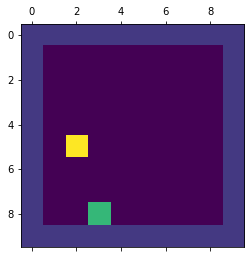

In [2]:
importlib.reload(env_mats)
env = env_mats.WebotsFakeMini(step_range=(1,1), action_type="discrete")
env.render()

### DQN Setup Parameters 
DQN(policy, env, gamma=0.99, learning_rate=0.0005, buffer_size=50000, exploration_fraction=0.1, exploration_final_eps=0.02, exploration_initial_eps=1.0, train_freq=1, batch_size=32, double_q=True, learning_starts=1000, target_network_update_freq=500, prioritized_replay=False, prioritized_replay_alpha=0.6, prioritized_replay_beta0=0.4, prioritized_replay_beta_iters=None, prioritized_replay_eps=1e-06, param_noise=False, n_cpu_tf_sess=None, verbose=0, tensorboard_log=None, _init_setup_model=True, policy_kwargs=None, full_tensorboard_log=False, seed=None)

### DQN Learn Parameters
learn(total_timesteps, callback=None, log_interval=100, tb_log_name='DQN', reset_num_timesteps=True, replay_wrapper=None)

### DQN Predict Parameters
predict(observation, state=None, mask=None, deterministic=True)

### DQN MlpPolicy Parameters
MlpPolicy(sess, ob_space, ac_space, n_env, n_steps, n_batch, reuse=False, obs_phs=None, dueling=True, **_kwargs)

array([8.0, 5.0, 5.0, 7.0, None, 0], dtype=object)

<Figure size 720x720 with 0 Axes>

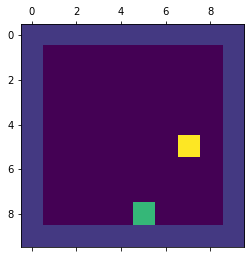

In [3]:
env.reset()
env.render()
test = env
env.state

In [5]:
time_steps = 40000
reward_function = "pReward"
fake = "WebotFakeMini"
name = "noObstacle"
model_nr = 0
model_name = "DQN_{}_{}_{}_{}_{}".format(fake, name, reward_function, time_steps, model_nr)

model = DQN(MlpPolicy, env, verbose=1, learning_rate=0.01, exploration_fraction=0.4)
model.learn(total_timesteps=time_steps, log_interval=100)
model.save("models/{}".format(model_name))
del model







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








--------------------------------------
| % time spent exploring  | 87       |
| episodes                | 100      |
| mean 100 episode reward | -507     |
| steps                   | 1967     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 75       |
| episodes                | 200      |
| mean 100 episode reward | -179     |
| steps                   | 3955     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 66       |
| episodes                | 300      |
| mean 100 episode reward | 117      |
| steps                   | 5521     |
--------------------------------------
--------------------------------------
| % time spent exp

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2000     |
| mean 100 episode reward | 1.01e+04 |
| steps                   | 21221    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2100     |
| mean 100 episode reward | 6.55e+03 |
| steps                   | 25642    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2200     |
| mean 100 episode reward | -253     |
| steps                   | 30248    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2300     |
| mean 100 episode reward | -930     |
| steps                   | 31142    |
--------------------------------------
--------------------------------------
| % time spent exploring 

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/mats/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

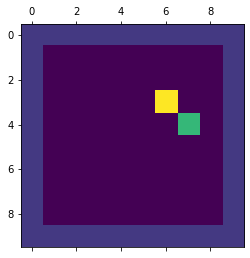

In [9]:
#model_name = ""
model = DQN.load("models/{}".format(model_name))
env = env_mats.WebotsFakeMini(step_range=(1,1), action_type="discrete")
#env = test
obs = env.reset()

env.render()
done = False
max_num_steps = 10
time = 0

1
1
1
2
1
2
2
2
2
2
Done: False in 10 steps - final reward 7.81327461511599 


<Figure size 720x720 with 0 Axes>

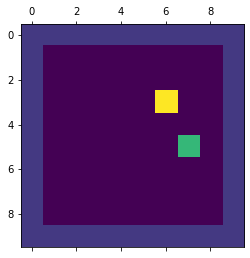

<Figure size 720x720 with 0 Axes>

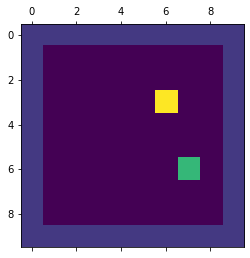

<Figure size 720x720 with 0 Axes>

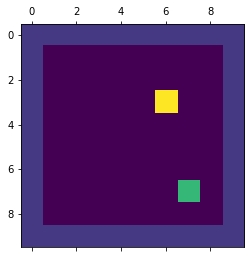

<Figure size 720x720 with 0 Axes>

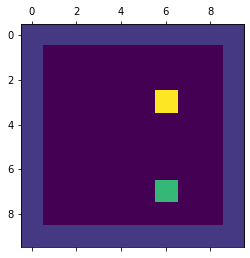

<Figure size 720x720 with 0 Axes>

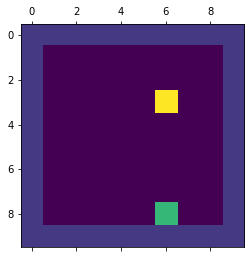

<Figure size 720x720 with 0 Axes>

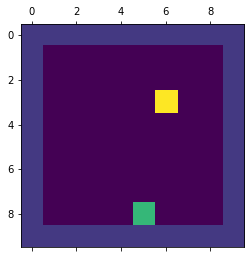

<Figure size 720x720 with 0 Axes>

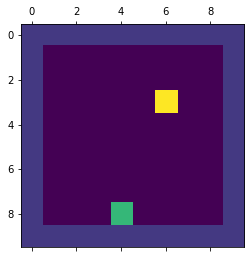

<Figure size 720x720 with 0 Axes>

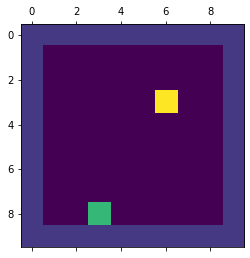

<Figure size 720x720 with 0 Axes>

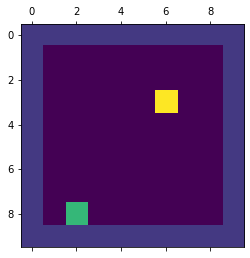

<Figure size 720x720 with 0 Axes>

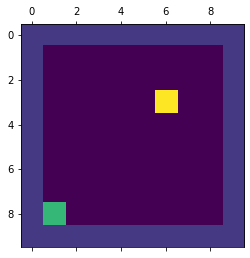

In [10]:
while not done and time < max_num_steps:
    time +=1
    action, _states = model.predict(obs)
    print(action)
    obs, rewards, done, info = env.step(action)
    
    if (time % 1) == 0: 
        env.render()
        
print('Done: {} in {} steps - final reward {} '.format(done, time, rewards))

In [ ]:
env.render()

In [ ]:
env.state